In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import lazypredict
import sklearn
import joblib

In [184]:
df = pd.read_csv("diabetes.csv")

In [185]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,250.00,33.60,0.63,50,1
1,1,85,66,29,300.00,26.60,0.35,31,0
2,8,183,64,0,NaN,23.30,0.67,32,1
3,1,89,66,23,94.00,28.10,0.17,21,0
4,0,137,40,35,168.00,43.10,2.29,33,1


In [228]:
df["Outcome"].replace((1, 0), ("YES", "NO"), inplace=True)

In [229]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,250.00,33.60,0.63,50,YES
1,1,85,66,29,300.00,26.60,0.35,31,NO
3,1,89,66,23,94.00,28.10,0.17,21,NO
4,0,137,40,35,168.00,43.10,2.29,33,YES
6,3,78,50,32,88.00,31.00,0.25,26,YES
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.00,32.90,0.17,63,NO
764,2,122,70,27,0.00,36.80,0.34,27,NO
765,5,121,72,23,112.00,26.20,0.24,30,NO
766,1,126,60,0,0.00,30.10,0.35,47,YES


In [230]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,766.00,766.00,766.00,766.00,766.00,766.00,766.00,766.00
mean,3.84,120.82,69.11,20.59,81.25,32.01,0.47,33.25
std,3.37,31.93,19.38,15.94,116.22,7.88,0.33,11.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.32,0.24,24.00
50%,3.00,117.00,72.00,23.00,36.50,32.00,0.37,29.00
75%,6.00,140.00,80.00,32.00,130.00,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


In [231]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180.00,32.90,0.17,63,NO
764,2,122,70,27,0.00,36.80,0.34,27,NO
765,5,121,72,23,112.00,26.20,0.24,30,NO
766,1,126,60,0,0.00,30.10,0.35,47,YES
767,1,93,70,31,0.00,30.40,0.32,23,NO


In [232]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [233]:
df.dropna(inplace=True)

In [234]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

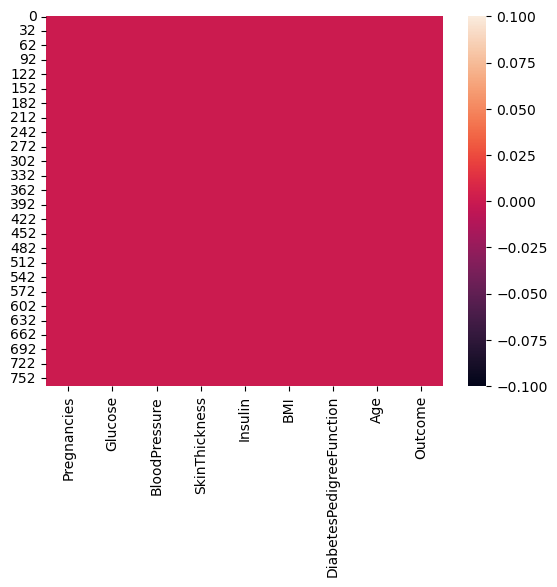

In [235]:
sns.heatmap(df.isna())

In [236]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
291,0,107,62,30,74.00,36.60,0.76,25,YES
10,4,110,92,0,0.00,37.60,0.19,30,NO
624,2,108,64,0,0.00,30.80,0.16,21,NO
126,3,120,70,30,135.00,42.90,0.45,30,NO
759,6,190,92,0,0.00,35.50,0.28,66,YES
685,2,129,74,26,205.00,33.20,0.59,25,NO
567,6,92,62,32,126.00,32.00,0.09,46,NO
223,7,142,60,33,190.00,28.80,0.69,61,NO
251,2,129,84,0,0.00,28.00,0.28,27,NO
303,5,115,98,0,0.00,52.90,0.21,28,YES


In [237]:
df.shape

(766, 9)

In [238]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                      object
dtype: object

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    int64  
 1   Glucose                   766 non-null    int64  
 2   BloodPressure             766 non-null    int64  
 3   SkinThickness             766 non-null    int64  
 4   Insulin                   766 non-null    float64
 5   BMI                       766 non-null    float64
 6   DiabetesPedigreeFunction  766 non-null    float64
 7   Age                       766 non-null    int64  
 8   Outcome                   766 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 59.8+ KB


In [240]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,766.00,766.00,766.00,766.00,766.00,766.00,766.00,766.00
mean,3.84,120.82,69.11,20.59,81.25,32.01,0.47,33.25
std,3.37,31.93,19.38,15.94,116.22,7.88,0.33,11.77
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.32,0.24,24.00
50%,3.00,117.00,72.00,23.00,36.50,32.00,0.37,29.00
75%,6.00,140.00,80.00,32.00,130.00,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


In [241]:
df.shape

(766, 9)

In [242]:
df=df.drop_duplicates()

In [243]:
df.shape

(766, 9)

In [244]:
corr = df.corr()

<AxesSubplot:>

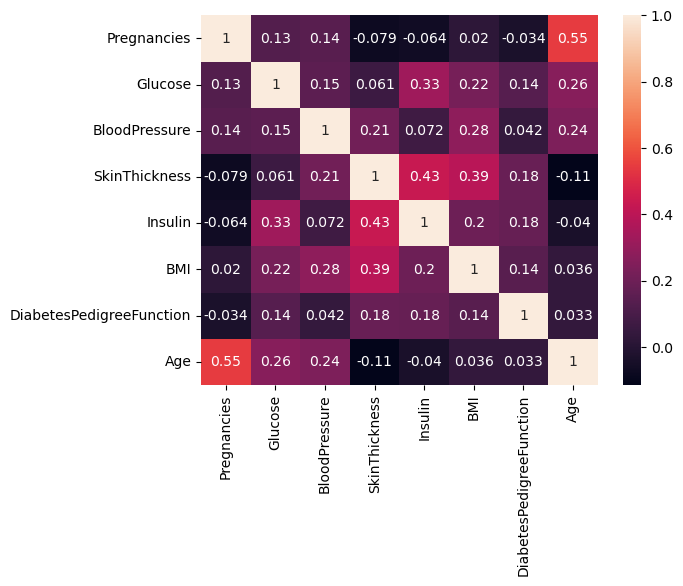

In [245]:
sns.heatmap(corr,annot=True)

In [246]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Negative (0):  499
Positive (1):  267


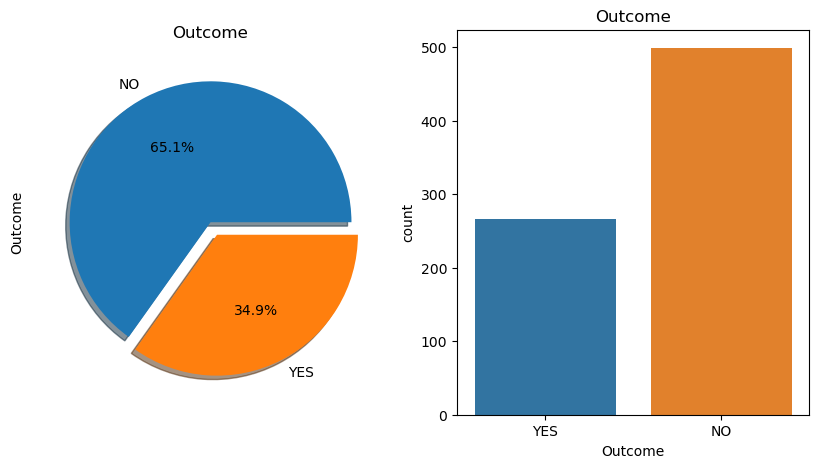

In [247]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
N,P = df['Outcome'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)
plt.show()

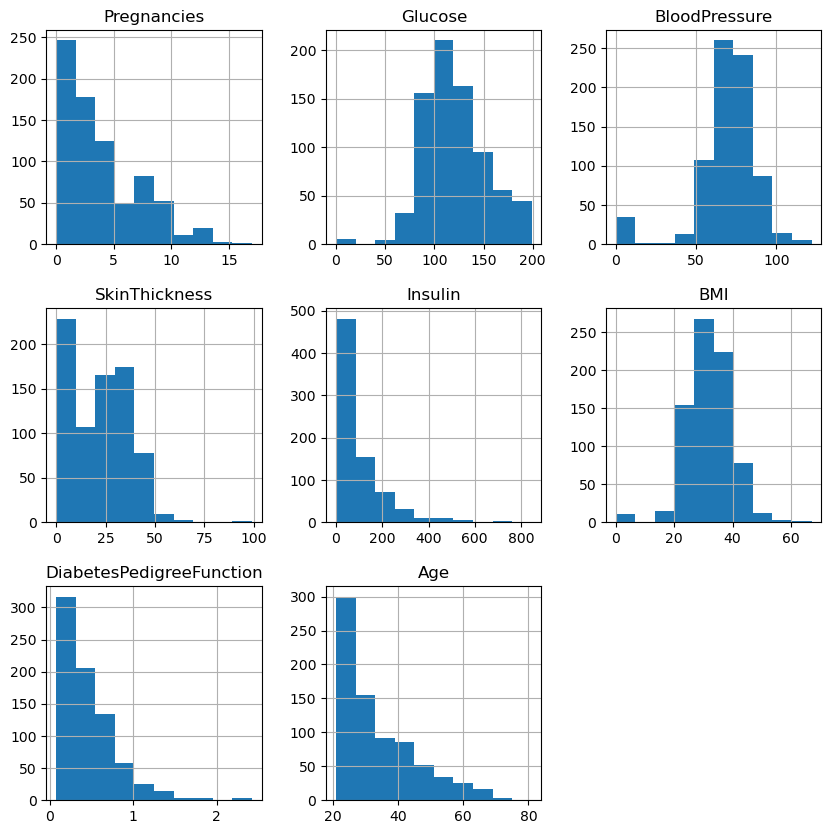

In [248]:
df.hist(bins=10,figsize=(10,10))
plt.show()

In [249]:
target_name = 'Outcome'
y = df["Outcome"]
x = df.drop("Outcome", axis=1)

In [250]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,250.00,33.60,0.63,50
1,1,85,66,29,300.00,26.60,0.35,31
3,1,89,66,23,94.00,28.10,0.17,21
4,0,137,40,35,168.00,43.10,2.29,33
6,3,78,50,32,88.00,31.00,0.25,26


In [251]:
y.head()

0    YES
1     NO
3     NO
4    YES
6    YES
Name: Outcome, dtype: object

In [252]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
SSX = scaler.transform(x)

In [253]:
SSX

array([[ 0.64185642,  0.85166573,  0.14944457, ...,  0.20149755,
         0.46791825,  1.42372124],
       [-0.84263034, -1.12238254, -0.16036474, ..., -0.68686772,
        -0.36510973, -0.19093152],
       [-0.84263034, -0.99704614, -0.16036474, ..., -0.49650374,
        -0.92046172, -1.04074877],
       ...,
       [ 0.34495906,  0.00564505,  0.14944457, ..., -0.73763145,
        -0.68504077, -0.27591325],
       [-0.84263034,  0.16231554, -0.47017406, ..., -0.24268509,
        -0.37114617,  1.16877606],
       [-0.84263034, -0.87170974,  0.0461748 , ..., -0.20461229,
        -0.47376556, -0.87078532]])

In [254]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(SSX, y, test_size=0.2, random_state=7)

In [255]:
x_train.shape,y_train.shape

((612, 8), (612,))

In [256]:
x_test.shape,y_test.shape

((154, 8), (154,))

In [257]:
x_test.shape

(154, 8)

In [258]:
x_train.shape

(612, 8)

In [259]:
y_test.shape, y_train.shape

((154,), (612,))

In [260]:

from lazypredict.Supervised import LazyClassifier
lzc = LazyClassifier()
c = lzc.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 13.33it/s]


In [261]:
c

(                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
 Model                                                                          
 AdaBoostClassifier                 0.79               0.75    None      0.78   
 CalibratedClassifierCV             0.80               0.73    None      0.79   
 RidgeClassifierCV                  0.79               0.72    None      0.77   
 NearestCentroid                    0.71               0.72    None      0.72   
 RidgeClassifier                    0.78               0.72    None      0.77   
 LinearDiscriminantAnalysis         0.77               0.71    None      0.76   
 LogisticRegression                 0.77               0.71    None      0.76   
 LinearSVC                          0.77               0.71    None      0.76   
 LGBMClassifier                     0.75               0.71    None      0.74   
 BaggingClassifier                  0.76               0.71    None      0.75   
 RandomForestClassifier     

In [262]:
from sklearn.calibration import CalibratedClassifierCV
cccv = CalibratedClassifierCV()
model = cccv.fit(x_train, y_train)

In [263]:
y_predict = model.predict(x_test)

In [264]:
y_predict

array(['YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 

In [265]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict, y_test)

0.7987012987012987

In [266]:
pd.DataFrame({"Auctual values":y_test, "pedicted values": y_predict})

,Auctual values,pedicted values
237,YES,YES
715,YES,YES
766,YES,NO
498,YES,YES
63,NO,NO
...,...,...
338,YES,YES
309,YES,NO
72,YES,YES
747,NO,NO


In [267]:
joblib.dump(cccv, "diabets_prediction")

['diabets_prediction']

In [268]:
model = joblib.load("diabets_prediction")

In [269]:
model.predict([[6, 148, 72, 35, 250.00, 33.60, 0.63, 50]])

array(['YES'], dtype=object)